<a href="https://colab.research.google.com/github/zyf2021/fcc_book_recommendation_knn/blob/main/fcc_book_recommendation_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [3]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip


!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2024-07-20 19:29:36--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M  68.7MB/s    in 0.4s    

2024-07-20 19:29:38 (68.7 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [3]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

## Шаг 1: Импорт и очистка данных

1. **Импортируйте необходимые библиотеки:**
   - Вам понадобятся библиотеки для работы с данными (`pandas`) и для реализации алгоритма K-ближайших соседей (`sklearn.neighbors`).

2. **Загрузите данные:**
   - Загрузите датасет, который включает информацию о книгах, пользователях и их оценках.

3. **Очистка данных:**
   - Удалите пользователей, которые оставили менее 200 оценок, чтобы избежать статистической незначительности.
   - Удалите книги, которые были оценены менее 100 раз, чтобы сосредоточиться на наиболее популярных книгах.

### Шаг 2: Подготовка данных

1. **Создание матрицы пользователь-книга:**
   - Сформируйте матрицу, где строки представляют пользователей, столбцы представляют книги, а значения — оценки, которые пользователи дали книгам.

2. **Заполнение пропущенных значений:**
   - Решите, как будете заполнять пропущенные значения в матрице (например, нулями или средними значениями).

### Шаг 3: Модель K-ближайших соседей

1. **Создание модели:**
   - Используйте алгоритм K-ближайших соседей (`NearestNeighbors` из `sklearn.neighbors`).
   - Настройте параметры модели, такие как количество соседей (k) и метрику расстояния (например, косинусное расстояние).

2. **Обучение модели:**
   - Обучите модель на данных, которые вы подготовили.

### Шаг 4: Функция для рекомендаций

1. **Создание функции `get_recommends`:**
   - Эта функция должна принимать название книги и находить ближайших соседей для данной книги.
   - Функция должна возвращать список из 5 наиболее похожих книг и их расстояния до данной книги.

### Подсказки по каждому шагу:

1. **Импорт и очистка данных:**
   - Убедитесь, что данные загружаются корректно и имеют нужный формат.
   - Проверьте, что фильтрация данных по количеству оценок пользователей и книг выполнена правильно.

2. **Подготовка данных:**
   - Постройте матрицу пользователь-книга с помощью `pivot_table`.
   - Определите, как будете обрабатывать пропущенные значения.

3. **Модель K-ближайших соседей:**
   - Выберите метрику расстояния, которая лучше всего подходит для вашей задачи (например, косинусное расстояние).
   - Определите оптимальное количество соседей (k) для вашей модели.

4. **Функция для рекомендаций:**
   - Убедитесь, что функция корректно находит ближайших соседей.
   - Проверьте, что результат функции соответствует ожидаемому формату.

Эти шаги и подсказки помогут вам структурировать решение задачи и эффективно реализовать алгоритм рекомендаций для книг.

In [4]:

isbn_counts = df_ratings['isbn'].value_counts()
isbn_counts

isbn
0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: count, Length: 340556, dtype: int64

### Удалите пользователей, которые оставили менее 200 оценок, чтобы избежать статистической незначительности.

In [5]:
user_counts = df_ratings['user'].value_counts()
user_counts = user_counts[user_counts > 200].index
filtered_ratings = df_ratings[df_ratings['user'].isin(user_counts)]

In [6]:
filtered_ratings

,user,isbn,rating
1456,277427,002542730X,10.0
1457,277427,0026217457,0.0
1458,277427,003008685X,8.0
1459,277427,0030615321,0.0
1460,277427,0060002050,0.0
...,...,...,...
1147612,275970,3829021860,0.0
1147613,275970,4770019572,0.0
1147614,275970,896086097,0.0
1147615,275970,9626340762,8.0


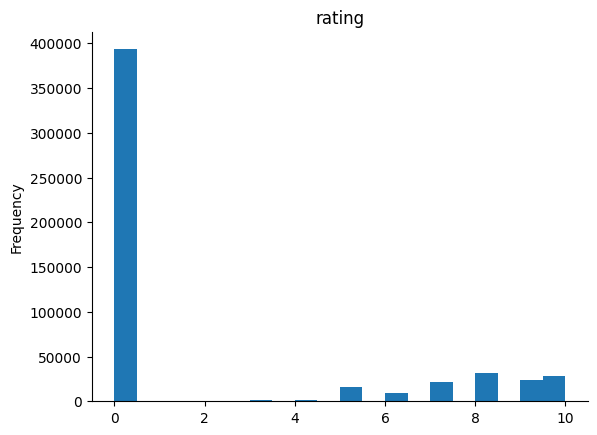

In [7]:
# @title rating

from matplotlib import pyplot as plt
filtered_ratings['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

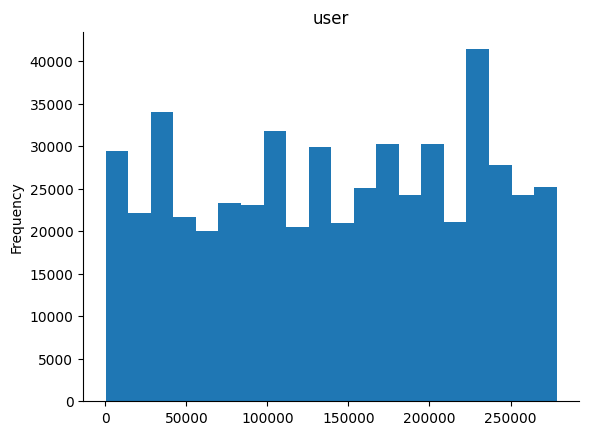

In [8]:
# @title user

from matplotlib import pyplot as plt
filtered_ratings['user'].plot(kind='hist', bins=20, title='user')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Удалите книги, которые были оценены менее 100 раз, чтобы сосредоточиться на наиболее популярных книгах.

In [9]:
isbn_counts = df_ratings['isbn'].value_counts()
isbn_counts = isbn_counts[isbn_counts > 100].index
filtered_ratings = filtered_ratings[filtered_ratings['isbn'].isin(isbn_counts)]
filtered_ratings

,user,isbn,rating
1456,277427,002542730X,10.0
1469,277427,0060930535,0.0
1471,277427,0060934417,0.0
1474,277427,0061009059,9.0
1484,277427,0140067477,0.0
...,...,...,...
1147304,275970,0804111359,0.0
1147436,275970,140003065X,0.0
1147439,275970,1400031346,0.0
1147440,275970,1400031354,0.0


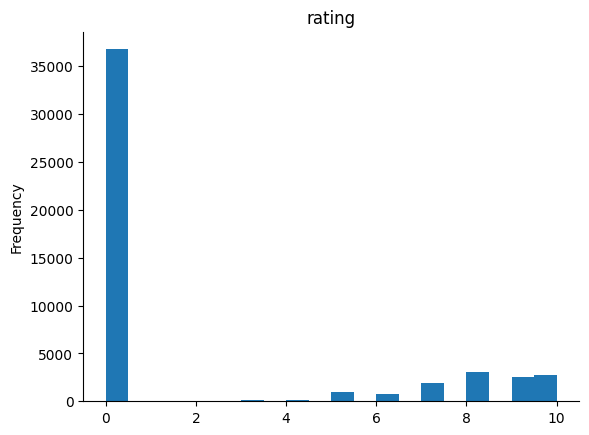

In [10]:
# @title rating

from matplotlib import pyplot as plt
filtered_ratings['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Шаг 2: Подготовка данных

### Решите, как будете заполнять пропущенные значения в матрице (например, нулями или средними значениями). Mean
- Посмотрим сколько пропщенных будет в датасете
- сгруппируем пропущенные по isbn и найдем среднее арфмитическое для каждого
- заменим 0 и NaN на mean

In [11]:
missing_values = filtered_ratings.isnull().sum()
print(missing_values)

zero_values = (filtered_ratings == 0).sum()
print(zero_values)

user      0
isbn      0
rating    0
dtype: int64
user          0
isbn          0
rating    36757
dtype: int64


In [12]:
# Найти среднее значение для столбца 'rating', исключая нули
mean_rating = filtered_ratings['rating'][filtered_ratings['rating'] != 0].mean()
mean_rating

7.975594

In [13]:
# Вычисляем среднее значение для каждого ISBN, исключая нули
isbn_mean_ratings = filtered_ratings[filtered_ratings['rating'] != 0].groupby('isbn')['rating'].mean()

In [14]:
# Вычисляем среднее значение для каждого ISBN, исключая нули
isbn_mean_ratings = filtered_ratings[filtered_ratings['rating'] != 0].groupby('isbn')['rating'].mean()
# Функция для замены нулевых значений на среднее значение
def replace_zero_with_mean(row):
    if row['rating'] == 0:
        return isbn_mean_ratings[row['isbn']]
    else:
        return row['rating']

# Применяем функцию к DataFrame
filtered_ratings['rating'] = filtered_ratings.apply(replace_zero_with_mean, axis=1)
print("DataFrame после замены нулевых значений на средние значения для каждого ISBN:")
print(filtered_ratings)

DataFrame после замены нулевых значений на средние значения для каждого ISBN:
           user        isbn     rating
1456     277427  002542730X  10.000000
1469     277427  0060930535   7.480000
1471     277427  0060934417   8.333333
1474     277427  0061009059   9.000000
1484     277427  0140067477   8.125000
...         ...         ...        ...
1147304  275970  0804111359   6.750000
1147436  275970  140003065X   8.750000
1147439  275970  1400031346   8.473684
1147440  275970  1400031354   8.342857
1147441  275970  1400031362   8.555555

[49254 rows x 3 columns]


<ipython-input-14-9a8d0937f9db>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ratings['rating'] = filtered_ratings.apply(replace_zero_with_mean, axis=1)


In [15]:
unique_users = filtered_ratings['user'].nunique()
print("Количество уникальных пользователей:", unique_users)

unique_isbn = filtered_ratings['isbn'].nunique()
print("Количество уникальных книг:", unique_isbn)


Количество уникальных пользователей: 882
Количество уникальных книг: 721


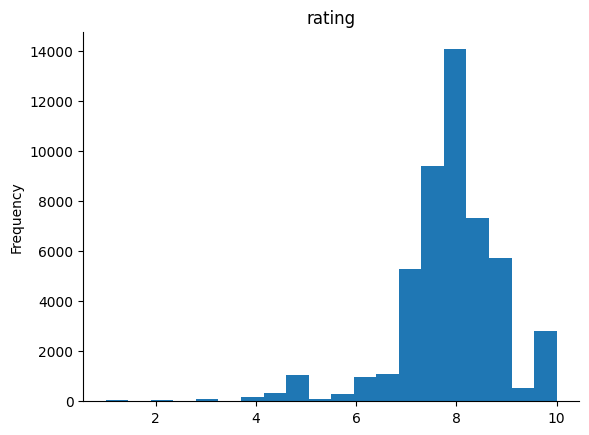

In [16]:
# @title rating

from matplotlib import pyplot as plt
filtered_ratings['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Шаг 3: Анализ книг

In [17]:
df_books.isnull().sum()

isbn      0
title     0
author    2
dtype: int64

In [18]:
(df_books == 0).sum()

isbn      0
title     0
author    0
dtype: int64

In [19]:
df_books['isbn'].nunique()

271379

# Шаг 4

### Сформируйте матрицу, где строки представляют пользователей, столбцы представляют книги, а значения — оценки, которые пользователи дали книгам.

In [20]:
book_user_matrix = filtered_ratings.pivot_table(index='isbn', columns='user', values='rating').fillna(0)
book_user_matrix

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,7.454545,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,8.416667,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
0060173289,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573227331,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,6.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229326,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,6.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229571,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,7.454545,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# add your code here - consider creating a new cell for each section of code
X = book_user_matrix.values

# Создание и обучение модели K-ближайших соседей
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(X)

# Получение ближайших соседей для первой книги
# distances, indices = model.kneighbors(X[0].reshape(1, -1), n_neighbors=5)

# print("Расстояния до ближайших соседей:", distances)
# print("Индексы ближайших соседей:", indices)

NearestNeighbors(algorithm='brute', metric='cosine')

In [24]:
# Достанем isbn
current_isbn = df_books[df_books['title'] == "Where the Heart Is (Oprah's Book Club (Paperback))"].iloc[0]['isbn']
print(current_isbn)
# Преобразуем в numpy строку с оценками выбранного isbn
book_user_matrix.loc[current_isbn].values.reshape(1, -1)
# Найдем подходящие книги по модели
distances, indices = model.kneighbors(book_user_matrix.loc[current_isbn].values.reshape(1, -1), n_neighbors=5)
print("Расстояния до ближайших соседей:", distances)
print("Индексы ближайших соседей:", indices)

# Преобразуем indices в одномерный массив, иначе рисует кракозябру...
indices = indices.flatten()
for el in indices:
  isbn = book_user_matrix.index[el]
  try:
    print(df_books[df_books['isbn'] == isbn].iloc[0]['title'])
  except Exception as e:
    pass

0446672211
Расстояния до ближайших соседей: [[0.         0.53407781 0.53863189 0.56190295 0.56545152]]
Индексы ближайших соседей: [[428 101 200  14 633]]
Where the Heart Is (Oprah's Book Club (Paperback))
The Pilot's Wife : A Novel
Midwives: A Novel
Divine Secrets of the Ya-Ya Sisterhood: A Novel


# Попытка 2

In [4]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [5]:
user_counts = df_ratings['user'].value_counts()
user_counts = user_counts[user_counts > 200].index
filtered_ratings = df_ratings[df_ratings['user'].isin(user_counts)]
isbn_counts = df_ratings['isbn'].value_counts()
isbn_counts = isbn_counts[isbn_counts > 100].index
filtered_ratings = filtered_ratings[filtered_ratings['isbn'].isin(isbn_counts)]
filtered_ratings.head()

,user,isbn,rating
1456,277427,002542730X,10.0
1469,277427,0060930535,0.0
1471,277427,0060934417,0.0
1474,277427,0061009059,9.0
1484,277427,0140067477,0.0


In [6]:
full_df = pd.merge(df_books, filtered_ratings, on='isbn')
full_df.head()

,isbn,title,author,user,rating
0,0440234743,The Testament,John Grisham,277478,0.0
1,0440234743,The Testament,John Grisham,2977,0.0
2,0440234743,The Testament,John Grisham,3363,0.0
3,0440234743,The Testament,John Grisham,7346,9.0
4,0440234743,The Testament,John Grisham,9856,0.0


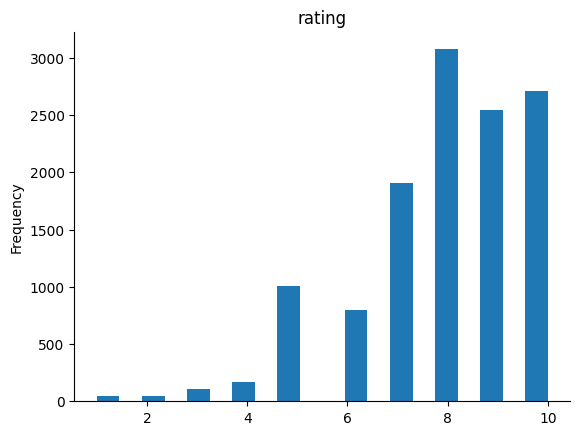

In [17]:
# @title rating

from matplotlib import pyplot as plt
full_df['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
full_df.isnull().sum()

isbn      0
title     0
author    0
user      0
rating    0
dtype: int64

In [8]:
(full_df == 0).sum()

isbn          0
title         0
author        0
user          0
rating    36585
dtype: int64

In [9]:
full_df = full_df.loc[full_df['rating'] != 0]

In [10]:
(full_df == 0).sum()

isbn      0
title     0
author    0
user      0
rating    0
dtype: int64

In [ ]:
# Вычисляем среднее значение для каждого ISBN, исключая нули
# isbn_mean_ratings = filtered_ratings[filtered_ratings['rating'] != 0].groupby('isbn')['rating'].mean()
# Функция для замены нулевых значений на среднее значение
def replace_zero_with_mean(row):
    if row['rating'] == 0:
        return isbn_mean_ratings[row['isbn']]
    else:
        return row['rating']

# Применяем функцию к DataFrame
# filtered_ratings['rating'] = filtered_ratings.apply(replace_zero_with_mean, axis=1)
# print("DataFrame после замены нулевых значений на средние значения для каждого ISBN:")
# print(filtered_ratings)

In [25]:
full_df_pivot = full_df.pivot(index='isbn', columns='user', values='rating').fillna(0)

In [26]:
full_df_pivot

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,273979,274004,274061,274301,274308,274808,275970,277427,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573227331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# add your code here - consider creating a new cell for each section of code
X = full_df_pivot.values

# Создание и обучение модели K-ближайших соседей
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5, n_jobs=-1)
model.fit(X)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

In [55]:
# book_user_matrix
# Достанем isbn
current_isbn = full_df[full_df['title'] == "Where the Heart Is (Oprah's Book Club (Paperback))"].iloc[0]['isbn']
print(current_isbn)
# Преобразуем в numpy строку с оценками выбранного isbn
full_df_pivot.loc[current_isbn].values.reshape(1, -1)
# Найдем подходящие книги по модели
distances, indices = model.kneighbors(full_df_pivot.loc[current_isbn].values.reshape(1, -1), n_neighbors=6)
print("Расстояния до ближайших соседей:", distances)
print("Индексы ближайших соседей:", indices)


0446672211
Расстояния до ближайших соседей: [[0.         0.7230184  0.76770747 0.7699411  0.77085835 0.8016211 ]]
Индексы ближайших соседей: [[427 104  26 178 116 614]]


In [56]:
recommended_books = []
# Преобразуем indices в одномерный массив, иначе рисует кракозябру...
indices = indices.flatten()
distances = distances.flatten()
for i in range(len(indices)):

  isbn = full_df_pivot.index[indices[i]]

  if distances[i] == 0:
    recommended_books.append(full_df[full_df['isbn'] == isbn].iloc[0]['title'])
    recommended_books.append([])
  else:
    recommended_books[1].append([full_df[full_df['isbn'] == isbn].iloc[0]['title'], distances[i]])

  # отсортировать это все

recommended_books

["Where the Heart Is (Oprah's Book Club (Paperback))",
 [['The Lovely Bones: A Novel', 0.7230184],
  ['I Know This Much Is True', 0.76770747],
  ['The Surgeon', 0.7699411],
  ['The Weight of Water', 0.77085835],
  ["I'll Be Seeing You", 0.8016211]]]

In [ ]:
recommended_books = []
# Преобразуем indices в одномерный массив, иначе рисует кракозябру...
indices = indices.flatten()
for el in indices:
  isbn = full_df_pivot.index[el]
  try:
    print(full_df[full_df['isbn'] == isbn].iloc[0]['title'])
    recommended_books.append(full_df[full_df['isbn'] == isbn].iloc[0]['title'])
  except Exception as e:
    pass

# Функция подбора рекомендаций
1. Найти isbn книги в df book
2. Найти по isbn запись в фильтеред_датафрейм
3. model.fit()
4. Отправить эту строку на подбор данных



```
[
  'The Queen of the Damned (Vampire Chronicles (Paperback))',
  [
    ['Catch 22', 0.793983519077301],
    ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479],
    ['Interview with the Vampire', 0.7345068454742432],
    ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.5376338362693787],
    ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]
  ]
]
```



In [42]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):

  # Достанем isbn
  current_isbn = full_df[full_df['title'] == book].iloc[0]['isbn']
  # print(current_isbn)
  # Преобразуем в numpy строку с оценками выбранного isbn
  full_df_pivot.loc[current_isbn].values.reshape(1, -1)
  # Найдем подходящие книги по модели
  distances, indices = model.kneighbors(full_df_pivot.loc[current_isbn].values.reshape(1, -1), n_neighbors=5)
  # print("Расстояния до ближайших соседей:", distances)
  # print("Индексы ближайших соседей:", indices)
  recommended_books = []
  # Преобразуем indices в одномерный массив, иначе рисует кракозябру...
  indices = indices.flatten()
  distances = distances.flatten()
  for i in range(len(indices)):

    isbn = full_df_pivot.index[indices[i]]

    if distances[i] == 0:
      recommended_books.append(full_df[full_df['isbn'] == isbn].iloc[0]['title'])
      recommended_books.append([])
    else:
      recommended_books[1].append([full_df[full_df['isbn'] == isbn].iloc[0]['title'], distances[i]])

  return recommended_books

In [44]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)


def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [['The Lovely Bones: A Novel', 0.7230184], ['I Know This Much Is True', 0.76770747], ['The Surgeon', 0.7699411], ['The Weight of Water', 0.77085835]]]
You haven't passed yet. Keep trying!
